In [215]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import ttest_ind
from sqlalchemy import create_engine
from scipy.stats.mstats import winsorize
from scipy.stats import boxcox
from scipy.stats import jarque_bera
from scipy.stats import normaltest
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_val_score
from wordcloud import WordCloud

import warnings

%matplotlib inline
sns.set()

warnings.filterwarnings('ignore')

In [66]:
data_path = ("Data/sentiment labelled sentences/amazon_cells_labelled.txt")
amazon_raw_df = pd.read_csv(data_path, delimiter= '\t', header=None)
amazon_raw_df.columns = ['MESSAGE', 'SPAM']

In [67]:
keywords = ['disappointed', 'not', "doesn't", "problems", "waste", 'broke', 'poor']

for key in keywords:
    amazon_raw_df[str(key)] = amazon_raw_df.MESSAGE.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

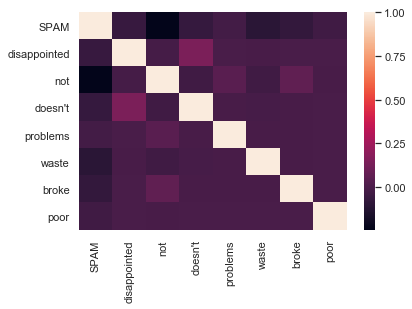

In [68]:
sns.heatmap(amazon_raw_df.corr())

In [69]:
data = amazon_raw_df[keywords]
target = amazon_raw_df['SPAM']

In [70]:
# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 402


## Trying the model on a different data set

In [72]:
data_path = ("Data/sentiment labelled sentences/yelp_labelled.txt")
yelp_raw_df = pd.read_csv(data_path, delimiter= '\t', header=None)
yelp_raw_df.columns = ['MESSAGE', 'SPAM']

In [73]:
keywords = ['disappointed', 'not', "doesn't", "problems", "waste", 'broke', 'poor']

for key in keywords:
    yelp_raw_df[str(key)] = yelp_raw_df.MESSAGE.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [74]:
data = yelp_raw_df[keywords]
target = yelp_raw_df['SPAM']

In [75]:
# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 415


The features were selcted based on intuition and a perusal of the data.  The model was ~60% accurate on both data sets. 

In [76]:
#Determine dominant class and percentage

count = 0

for val in target:
    if val == True:
        count += 1

print(count)
print(count/len(target))

500
0.5


The Yelp data set is 50% negative reviews, and the model is showing 58.5% accuracy- not much better than simply guessing. Let's see if we can improve the model by changing some features.

## Model 2

In [103]:
data_path = ("Data/sentiment labelled sentences/yelp_labelled.txt")
yelp_raw_df = pd.read_csv(data_path, delimiter= '\t', header=None)
yelp_raw_df.columns = ['MESSAGE', 'SPAM']

In [104]:
keywords = ['disappointed', 'not', "waste", 'poor', 'slow', 'avoid', 'never']

for key in keywords:
    yelp_raw_df[str(key)] = yelp_raw_df.MESSAGE.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

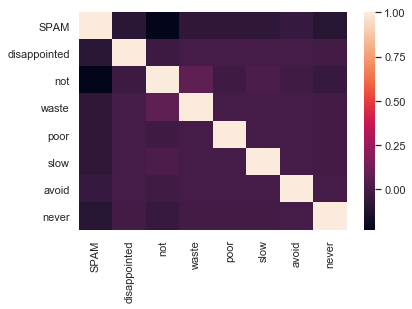

In [105]:
sns.heatmap(yelp_raw_df.corr())

In [106]:
data = yelp_raw_df[keywords]
target = yelp_raw_df['SPAM']

In [107]:
# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))


Number of mislabeled points out of a total 1000 points : 393


Accuracy went up to 60.7% from 58.5%.  A couple of points is better than no points. Let's try adding some features to see if performance improves further.

## Model 3

In [110]:
data_path = ("Data/sentiment labelled sentences/yelp_labelled.txt")
yelp_raw_df = pd.read_csv(data_path, delimiter= '\t', header=None)
yelp_raw_df.columns = ['MESSAGE', 'SPAM']

In [111]:
keywords = ['disappointed', 'not', "waste", 'poor', 'slow', 'avoid', 'never', 'nasty', 'sad', 'terrible', 'overpriced', 'dirty']

for key in keywords:
    yelp_raw_df[str(key)] = yelp_raw_df.MESSAGE.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

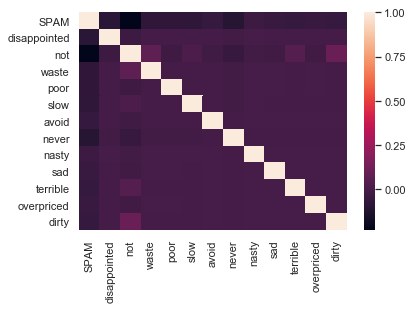

In [112]:
sns.heatmap(yelp_raw_df.corr())

In [113]:
data = yelp_raw_df[keywords]
target = yelp_raw_df['SPAM']

In [114]:
# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 385


Moving from 7 features up to 12 moved our predictive accuracy from 60.7% to 61.5%.  Let's add even more features and see if we can score another point or three.

## Model 4

In [122]:
data_path = ("Data/sentiment labelled sentences/yelp_labelled.txt")
yelp_raw_df = pd.read_csv(data_path, delimiter= '\t', header=None)
yelp_raw_df.columns = ['MESSAGE', 'SPAM']

In [123]:
keywords = ['disappointed', 'not', "waste", 'poor', 'slow', 'avoid', 'never', 'nasty', 'sad', 'terrible', 'overpriced', 'dirty', "won't", 'mediocre', 'rude', 'average', 'mistake']

for key in keywords:
    yelp_raw_df[str(key)] = yelp_raw_df.MESSAGE.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

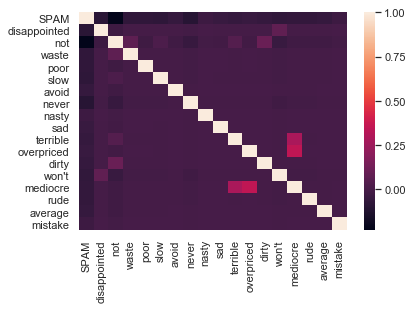

In [124]:
sns.heatmap(yelp_raw_df.corr())

In [125]:
data = yelp_raw_df[keywords]
target = yelp_raw_df['SPAM']

In [126]:
# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 367


With 17 features, our accuracy is up to 63.3%.  Let's check to see if our model is overfitting with a cross validation test.

In [128]:
cross_val_score(bnb, data, target, cv=10)

array([0.62, 0.62, 0.66, 0.58, 0.61, 0.65, 0.68, 0.65, 0.63, 0.61])

The cross validation scores range across 10 percentage points.  This could be indicative of some overfitting, but I am not really sure, since no guidelines for evaluating this test are provided in the course materials.

## Model 5

To start, let's replace the mediocre feature since it is correlating well with a couple of the other features.

In [150]:
data_path = ("Data/sentiment labelled sentences/yelp_labelled.txt")
yelp_raw_df = pd.read_csv(data_path, delimiter= '\t', header=None)
yelp_raw_df.columns = ['MESSAGE', 'SPAM']

In [151]:
keywords = ['disappointed', 'not', "waste", 'poor', 'slow', 'avoid', 'never', 'nasty', 'sad', 'terrible', 'overpriced', 'dirty', "won't", 'rude', 'average', 'mistake', 'sick']

for key in keywords:
    yelp_raw_df[str(key)] = yelp_raw_df.MESSAGE.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

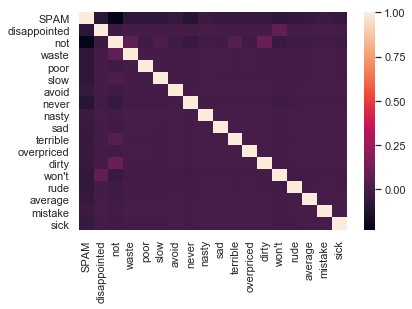

In [152]:
sns.heatmap(yelp_raw_df.corr())

Let's check each of the features for their frequencies.  

In [157]:
for key in keywords:
    print('Value counts for', key, '\n', yelp_raw_df[key].value_counts(), '\n')

Value counts for disappointed 
 False    992
True       8
Name: disappointed, dtype: int64 

Value counts for not 
 False    899
True     101
Name: not, dtype: int64 

Value counts for waste 
 False    995
True       5
Name: waste, dtype: int64 

Value counts for poor 
 False    995
True       5
Name: poor, dtype: int64 

Value counts for slow 
 False    994
True       6
Name: slow, dtype: int64 

Value counts for avoid 
 False    997
True       3
Name: avoid, dtype: int64 

Value counts for never 
 False    980
True      20
Name: never, dtype: int64 

Value counts for nasty 
 False    999
True       1
Name: nasty, dtype: int64 

Value counts for sad 
 False    998
True       2
Name: sad, dtype: int64 

Value counts for terrible 
 False    997
True       3
Name: terrible, dtype: int64 

Value counts for overpriced 
 False    998
True       2
Name: overpriced, dtype: int64 

Value counts for dirty 
 False    997
True       3
Name: dirty, dtype: int64 

Value counts for won't 
 False    

Many of the features are showing up as true for only a tiny fraction of the data.  Let's get rid of all features with hit frequencies < 1% and see how it affects performance of the model.

In [192]:
data_path = ("Data/sentiment labelled sentences/yelp_labelled.txt")
yelp_raw_df = pd.read_csv(data_path, delimiter= '\t', header=None)
yelp_raw_df.columns = ['MESSAGE', 'SPAM']

In [193]:
keywords = ['not', 'never', "won't"]

for key in keywords:
    yelp_raw_df[str(key)] = yelp_raw_df.MESSAGE.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

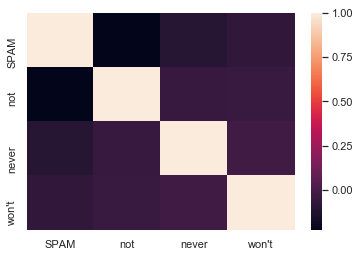

In [194]:
sns.heatmap(yelp_raw_df.corr())

In [195]:
data = yelp_raw_df[keywords]
target = yelp_raw_df['SPAM']

In [196]:
# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 408


In [197]:
cross_val_score(bnb, data, target, cv=10)

array([0.6 , 0.57, 0.64, 0.54, 0.6 , 0.59, 0.62, 0.59, 0.59, 0.58])

With only three features, our model is back down to just under 60% accuracy, and the overfitting spread is about 10 percentage points.  Let's try a _word cloud_ to see if we are missing any useful keywords.

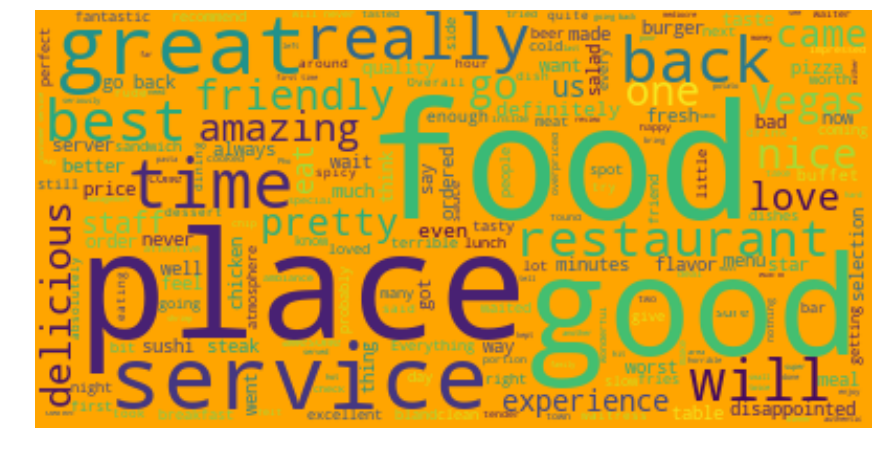

In [198]:
# Generate a word cloud image
wordcloud = WordCloud(background_color="orange").generate(" ".join(yelp_raw_df["MESSAGE"]))
plt.figure(figsize=(15,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()

The word cloud seems to suggest, with large frequecies of words like "good, great, amazing, and delicious," that an approach which targets positive sentiment might be more effective for this data set.

My fourth model had the best performance, but it has 17 features and it could be overfitting.  Features 'not', 'never' and 'won't' seem to have had the best performance.